#### Importing required libraries

In [1]:
# install packages
install.packages(c("dplyr", "ggplot2", "tidyr", "readr", "purrr", "stringr",
                "lubridate", "data.table", "plyr", "janitor", "reshape2", "readxl"))


The downloaded binary packages are in
	/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T//RtmpId3EU0/downloaded_packages


In [2]:
# load packages
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(purrr)
library(stringr)
library(lubridate)
library(data.table)
library(plyr)
library(janitor)
library(reshape2)
library(readxl)
library(mice)
library(gridExtra)
library(rlang)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:dplyr':

    between, first, last


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

--------------------------------------------------------------------------

#### Load the dataset

In [3]:
# define path we are working in
path <- "/Users/stevenschepanski/Documents/ANALYSIS/Kneipp"

In [4]:
# Read in data
sickdays_coworker <- read_csv(paste0(path, "/data/Sickdays_Coworkers.csv"))

Rows: 587 Columns: 33
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (32): Child_ID, kindergarten_ID, sickday_week1_day1, sickday_week1_day2,...
dbl  (1): Assessment

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 18 Columns: 33
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (1): kindergarten_ID
dbl (32): Assessment, total_teacher, sickday_week1_day1, sickday_week1_day2,...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# SICKDAYS_COWORKER

In [14]:
# Display the first few rows of the DataFrame using the 'head()' method
head(sickdays_coworker)

Assessment,kindergarten_ID,total_teacher,sickday_week1_day1,sickday_week1_day2,sickday_week1_day3,sickday_week1_day4,sickday_week1_day5,sickday_week2_day1,sickday_week2_day2,...,sickday_week5_day1,sickday_week5_day2,sickday_week5_day3,sickday_week5_day4,sickday_week5_day5,sickday_week6_day1,sickday_week6_day2,sickday_week6_day3,sickday_week6_day4,sickday_week6_day5
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MTB1,16,2,2,1,1,1,3,3,...,2,3,2,3,3,1,1,1,0,1
1,MTB2,9,1,2,2,2,2,1,1,...,2,2,2,2,2,1,1,1,1,1
1,MTB3,3,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,MZA1,8,1,1,1,1,1,0,0,...,2,2,2,2,2,2,2,2,2,2
1,MZA2,7,1,1,1,1,1,2,2,...,0,0,1,0,0,0,0,0,1,1
1,PBB1,6,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [15]:
# Get the dimensions of the DataFrame
num_rows <- nrow(sickdays_coworker)
num_cols <- ncol(sickdays_coworker)

# Print the dimensions in a sentence
print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 18 rows and 33 columns."


In [16]:
# show the structure of the data
str(sickdays_coworker, list.len = ncol(sickdays_coworker))

spc_tbl_ [18 x 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Assessment        : num [1:18] 1 1 1 1 1 1 1 1 1 2 ...
 $ kindergarten_ID   : chr [1:18] "MTB1" "MTB2" "MTB3" "MZA1" ...
 $ total_teacher     : num [1:18] 16 9 3 8 7 6 4 8 9 22 ...
 $ sickday_week1_day1: num [1:18] 2 1 0 1 1 1 2 0 0 5 ...
 $ sickday_week1_day2: num [1:18] 2 2 0 1 1 1 2 0 0 3 ...
 $ sickday_week1_day3: num [1:18] 1 2 0 1 1 0 2 0 0 3 ...
 $ sickday_week1_day4: num [1:18] 1 2 0 1 1 0 2 0 0 3 ...
 $ sickday_week1_day5: num [1:18] 1 2 0 1 1 0 2 0 0 5 ...
 $ sickday_week2_day1: num [1:18] 3 1 0 0 2 0 2 0 0 3 ...
 $ sickday_week2_day2: num [1:18] 3 1 0 0 2 0 2 1 0 3 ...
 $ sickday_week2_day3: num [1:18] 3 1 0 0 2 0 2 1 0 4 ...
 $ sickday_week2_day4: num [1:18] 3 1 0 0 2 1 1 1 0 4 ...
 $ sickday_week2_day5: num [1:18] 3 1 0 0 2 0 1 1 0 5 ...
 $ sickday_week3_day1: num [1:18] 1 1 0 1 0 0 1 0 0 4 ...
 $ sickday_week3_day2: num [1:18] 2 1 0 1 0 0 2 0 0 4 ...
 $ sickday_week3_day3: num [1:18] 3 1 0 1 0 1 2 0 0 5 ...
 $ 

In [17]:
# Recode the columns
sickdays_coworker <- sickdays_coworker %>%
  mutate_at(vars(1), as.numeric) %>%
  mutate_at(vars(2), as.factor) %>%
  mutate_at(vars(3:33), as.numeric)

In [18]:
# Just take rows that are complete
sickdays_coworker <- sickdays_coworker %>% drop_na()

In [19]:
# Get the dimensions of the DataFrame
num_rows <- nrow(sickdays_coworker)
num_cols <- ncol(sickdays_coworker)

# Print the dimensions in a sentence
print(sprintf("The DataFrame has %d rows and %d columns.", num_rows, num_cols))

[1] "The DataFrame has 18 rows and 33 columns."


In [20]:
# Check for duplicates
duplicates <- sickdays_coworker %>%
  duplicated() %>%
  sum()

# Print the number of duplicates
print(sprintf("The DataFrame has %d duplicates.", duplicates))

[1] "The DataFrame has 0 duplicates."


In [21]:
# change assessment and kindergarten_ID into factors
sickdays_coworker$Assessment <- as.factor(sickdays_coworker$Assessment)
sickdays_coworker$kindergarten_ID <- as.factor(sickdays_coworker$kindergarten_ID)

In [22]:
# Descriptive statistics
summary(sickdays_coworker)

 Assessment kindergarten_ID total_teacher    sickday_week1_day1
 1:9        MTB1   :2       Min.   : 3.000   Min.   :0.000     
 2:9        MTB2   :2       1st Qu.: 6.000   1st Qu.:0.000     
            MTB3   :2       Median : 8.000   Median :1.000     
            MZA1   :2       Mean   : 8.278   Mean   :1.111     
            MZA2   :2       3rd Qu.: 9.000   3rd Qu.:1.750     
            PBB1   :2       Max.   :22.000   Max.   :5.000     
            (Other):6                                          
 sickday_week1_day2 sickday_week1_day3 sickday_week1_day4 sickday_week1_day5
 Min.   :0.000      Min.   :0.0000     Min.   :0.0000     Min.   :0.0000    
 1st Qu.:0.000      1st Qu.:0.0000     1st Qu.:0.0000     1st Qu.:0.0000    
 Median :1.000      Median :1.0000     Median :0.5000     Median :1.0000    
 Mean   :1.056      Mean   :0.9444     Mean   :0.7778     Mean   :0.9444    
 3rd Qu.:2.000      3rd Qu.:1.0000     3rd Qu.:1.0000     3rd Qu.:1.0000    
 Max.   :3.000      Max.  

The dataset includes observations from various kindergartens, with a total of 9 kindergarten sites that were investigated at baseline (`Assessment` = 1) and at a 1-year followup (`Assessment` = 2). The highest number of teachers in one kindergarten is 22 and the lowest 3. On average there are 8.28 teachers and the median is 8.

For the sickdays across a six-week periods, the statistics reflect the variation in the number of sick days experiences by teachers in each kindergarten.
- Across all weeks and days, the mean number of sick days per kindergarten is realtively low, ranging from 0.78 to 1.28. The median is also generally low, around 1 day for most observations.
- The distribution is positively skewed, as shown by the differences between the mean and median, with a higher mean than median in may cases.
- The maximum number of sick days for any given day in any kindergarten ranges from 3-5 across all six weeks, indicating some outliers where there were higher numbers of sick days in specific kindergartens.

In general, the data suggests that the majority of kindergartens experience relatively few sick days among their teachers, but there are instances where the number of sick days is higher. This variability may indicate differences in factors such as the size of the kindergarten, health policies, or other contextual variables such as long-term sickness.

## Data Preprocessing

# SICKDAYS COWORKER

In [40]:
head(sickdays_coworker)

Assessment,kindergarten_ID,total_teacher,sickday_week1_day1,sickday_week1_day2,sickday_week1_day3,sickday_week1_day4,sickday_week1_day5,sickday_week2_day1,sickday_week2_day2,...,sickday_week5_day1,sickday_week5_day2,sickday_week5_day3,sickday_week5_day4,sickday_week5_day5,sickday_week6_day1,sickday_week6_day2,sickday_week6_day3,sickday_week6_day4,sickday_week6_day5
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MTB1,16,2,2,1,1,1,3,3,...,2,3,2,3,3,1,1,1,0,1
1,MTB2,9,1,2,2,2,2,1,1,...,2,2,2,2,2,1,1,1,1,1
1,MTB3,3,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
1,MZA1,8,1,1,1,1,1,0,0,...,2,2,2,2,2,2,2,2,2,2
1,MZA2,7,1,1,1,1,1,2,2,...,0,0,1,0,0,0,0,0,1,1
1,PBB1,6,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [41]:
sick_coworker <- sickdays_coworker %>%
  mutate(
    # Calculate the sum of sick days for each row (kindergarten)
    sickday_count = rowSums(select(., starts_with("sickday")), na.rm = TRUE),
    week1_count = rowSums(select(., starts_with("sickday_week1")), na.rm = TRUE),
    week2_count = rowSums(select(., starts_with("sickday_week2")), na.rm = TRUE),
    week3_count = rowSums(select(., starts_with("sickday_week3")), na.rm = TRUE),
    week4_count = rowSums(select(., starts_with("sickday_week4")), na.rm = TRUE),
    week5_count = rowSums(select(., starts_with("sickday_week5")), na.rm = TRUE),
    week6_count = rowSums(select(., starts_with("sickday_week6")), na.rm = TRUE),
    # Normalize sick day counts by dividing by total_teacher
    normalized_sickday_count = sickday_count / total_teacher,
    normalized_week1_count = week1_count / total_teacher,
    normalized_week2_count = week2_count / total_teacher,
    normalized_week3_count = week3_count / total_teacher,
    normalized_week4_count = week4_count / total_teacher,
    normalized_week5_count = week5_count / total_teacher,
    normalized_week6_count = week6_count / total_teacher,
    # Extract the number from kindergarten_ID and create Group column
    Group = as.integer(sub("\\D+", "", kindergarten_ID))
  ) %>%
  # Select necessary columns
  select(
    Assessment, kindergarten_ID,
    sickday_count, week1_count, week2_count, week3_count, week4_count, week5_count, week6_count,
    normalized_sickday_count, normalized_week1_count, normalized_week2_count,
    normalized_week3_count, normalized_week4_count, normalized_week5_count, normalized_week6_count,
    Group
  )


In [42]:
# recode Assessment, kindergarten_ID and pair_id as factor
sick_coworker$Assessment <- as.factor(sick_coworker$Assessment)
sick_coworker$kindergarten_ID <- as.factor(sick_coworker$kindergarten_ID)

In [43]:
# Change Group values where Group equals 3 to 2
sick_coworker$Group[sick_coworker$Group == 3] <- 2

In [44]:
head(sick_coworker)

Assessment,kindergarten_ID,sickday_count,week1_count,week2_count,week3_count,week4_count,week5_count,week6_count,normalized_sickday_count,normalized_week1_count,normalized_week2_count,normalized_week3_count,normalized_week4_count,normalized_week5_count,normalized_week6_count,Group
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MTB1,75,7,15,15,21,13,4,4.687500,0.4375000,0.9375000,0.9375000,1.3125000,0.8125000,0.2500000,1
1,MTB2,44,9,5,5,10,10,5,4.888889,1.0000000,0.5555556,0.5555556,1.1111111,1.1111111,0.5555556,2
1,MTB3,8,0,0,0,1,2,5,2.666667,0.0000000,0.0000000,0.0000000,0.3333333,0.6666667,1.6666667,2
1,MZA1,42,5,0,7,10,10,10,5.250000,0.6250000,0.0000000,0.8750000,1.2500000,1.2500000,1.2500000,1
1,MZA2,19,5,10,0,1,1,2,2.714286,0.7142857,1.4285714,0.0000000,0.1428571,0.1428571,0.2857143,2
1,PBB1,8,2,1,1,1,2,1,1.333333,0.3333333,0.1666667,0.1666667,0.1666667,0.3333333,0.1666667,1


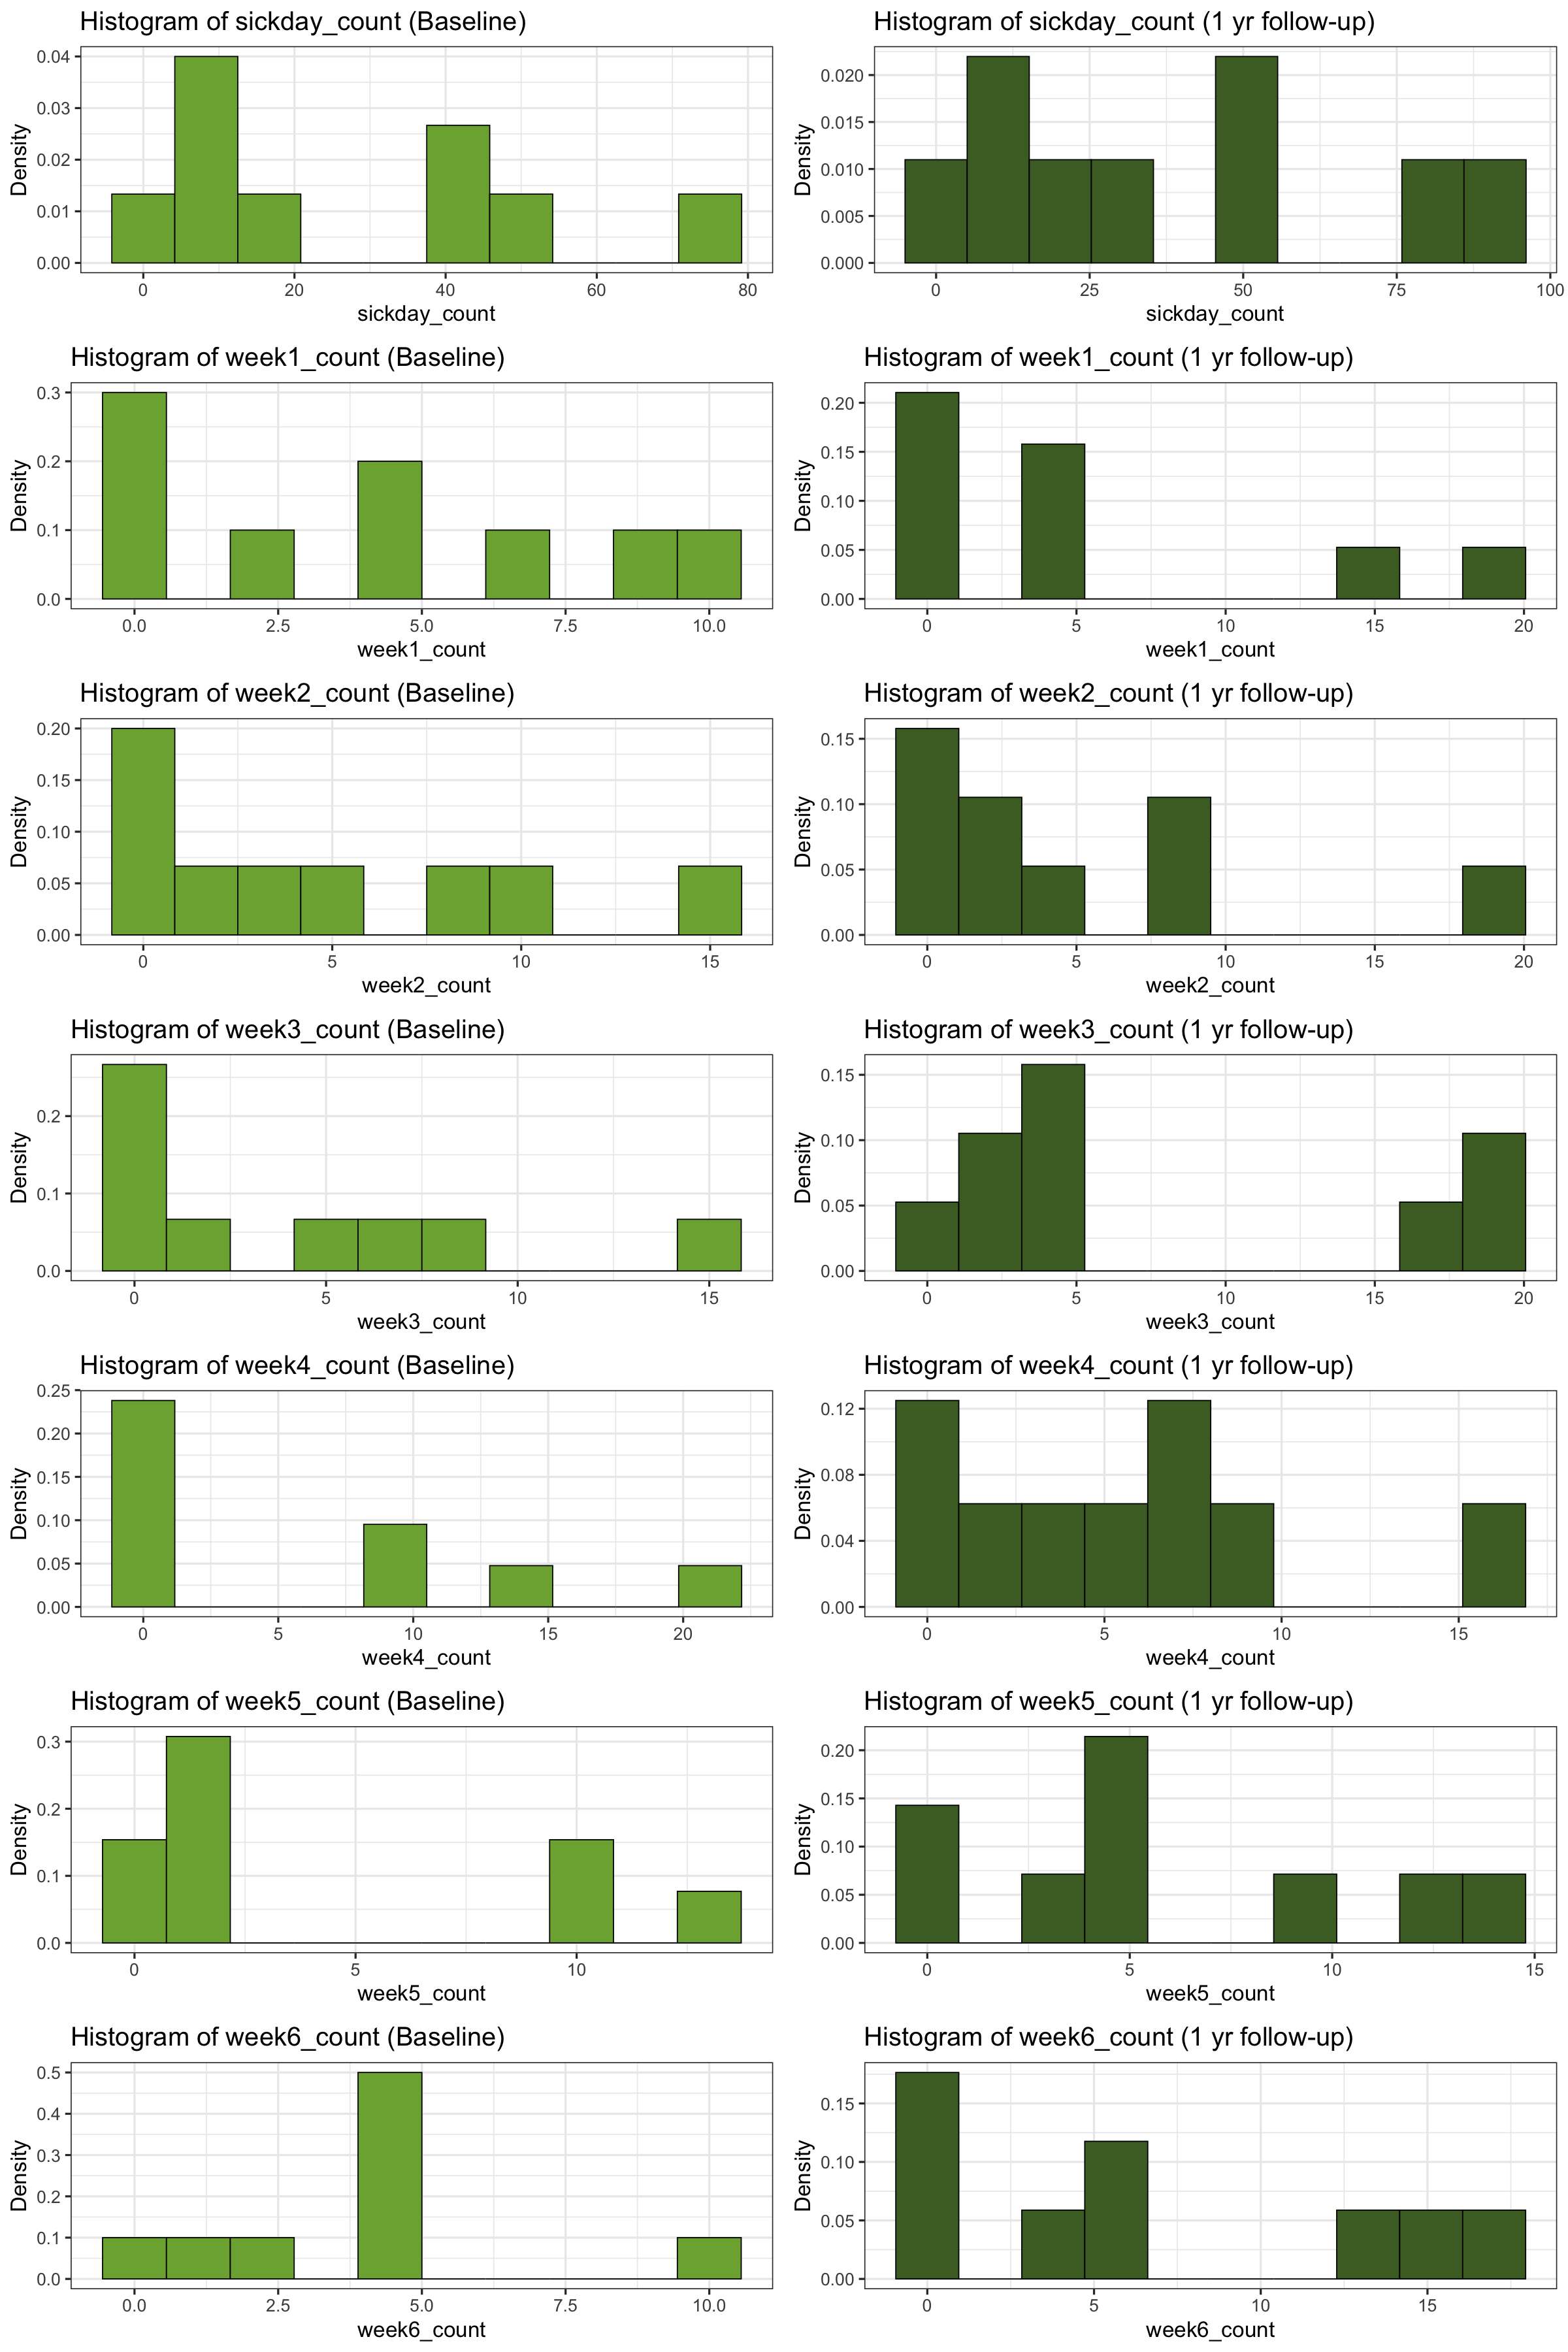

In [45]:
# Define the column names
columns <- c("sickday_count", "week1_count", "week2_count", "week3_count", "week4_count", "week5_count", "week6_count")

# Create the histograms for assessment = 1 (Baseline)
histograms_baseline <- map(
    columns,
    ~ ggplot(sick_coworker[sick_coworker$Assessment == 1, ], aes(!!sym(.x))) +
        geom_histogram(fill = "#7cad3e", color = "black", bins = 10, aes(y = ..density..)) +
#        geom_density(color = "blue", alpha = 0.5, size = 1.5) +
        labs(title = paste("Histogram of", .x, "(Baseline)"), x = .x, y = "Density")
)

# Create the histograms for assessment = 2 (1 yr follow-up)
histograms_followup <- map(
    columns,
    ~ ggplot(sick_coworker[sick_coworker$Assessment == 2, ], aes(!!sym(.x))) +
        geom_histogram(fill = "#4a6c2f", color = "black", bins = 10, aes(y = ..density..)) +
#        geom_density(color = "red", alpha = 0.5, size = 1.5) +
        labs(title = paste("Histogram of", .x, "(1 yr follow-up)"), x = .x, y = "Density")
)

# Combine the histograms in a grid
grid.arrange(grobs = c(rbind(histograms_baseline, histograms_followup)), ncol = 2)

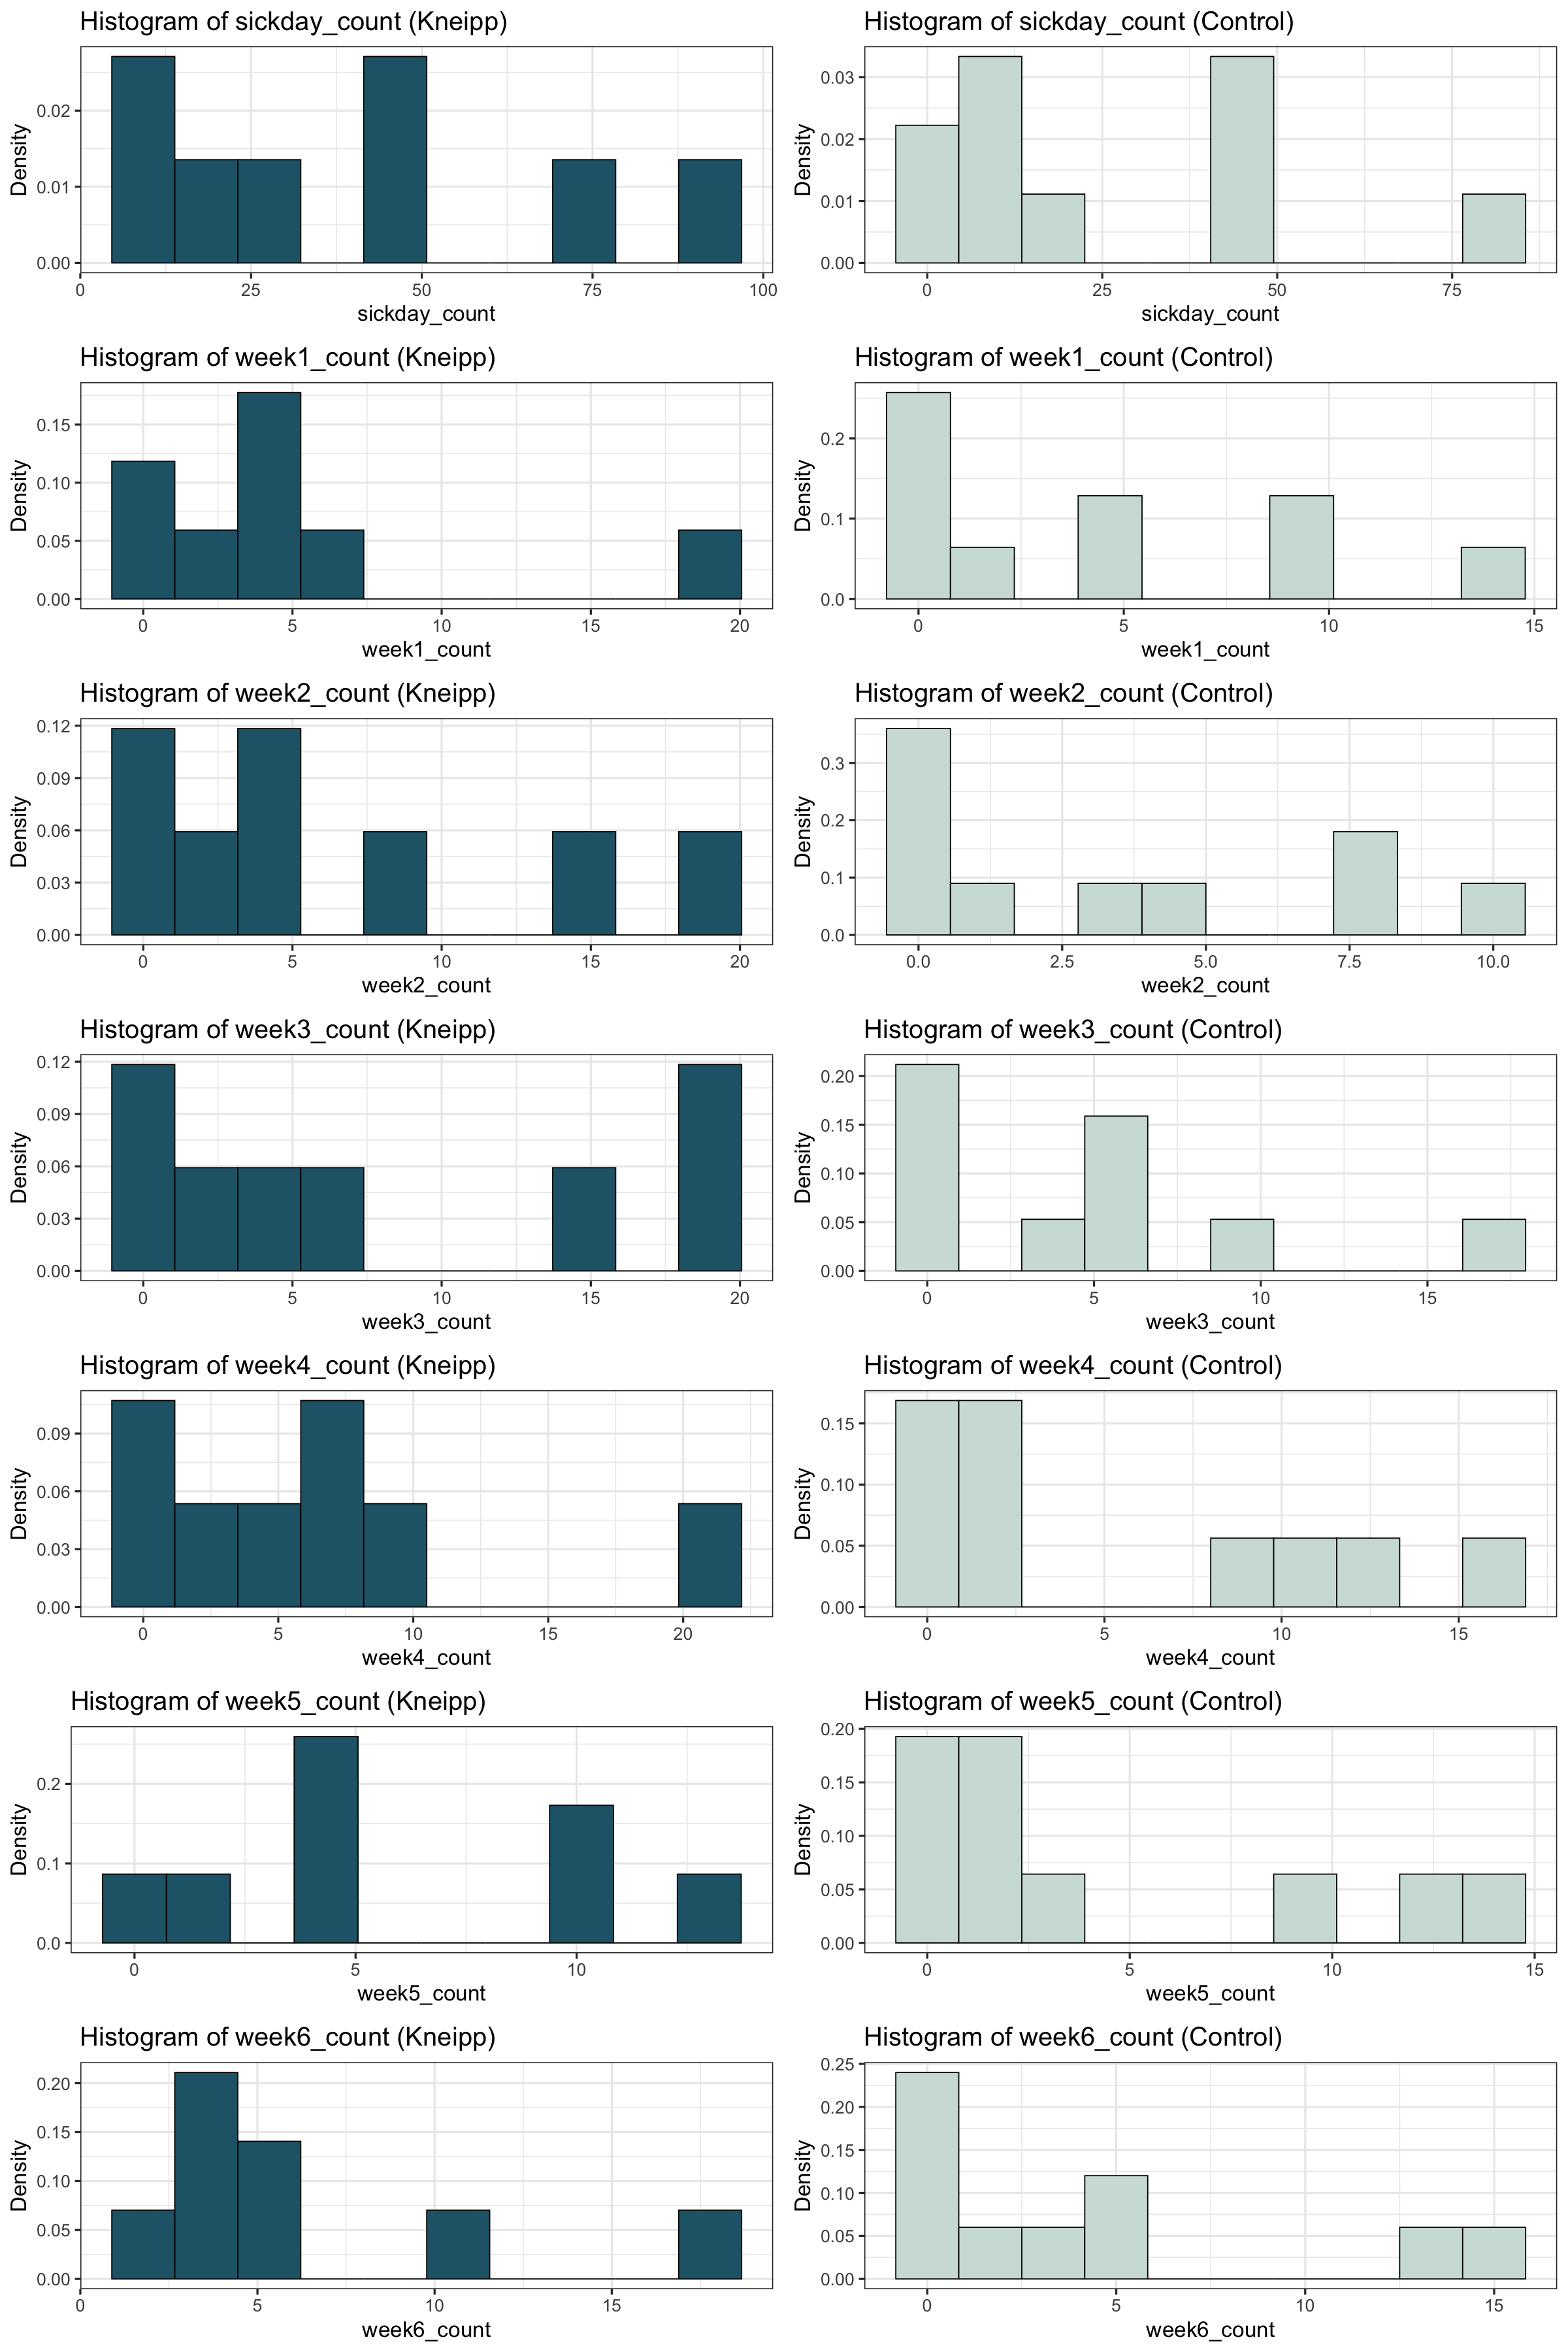

In [46]:
# Create the histograms for Group = 1
histograms_group1 <- map(
    columns,
    ~ ggplot(sick_coworker[sick_coworker$Group == 1, ], aes(!!sym(.x))) +
        geom_histogram(fill = "#236477", color = "black", bins = 10, aes(y = ..density..)) +
        # geom_density(color = "blue", alpha = 0.5, linewidth = 1.5) +
        labs(title = paste("Histogram of", .x, "(Kneipp)"), x = .x, y = "Density")
)

# Create the histograms for Group = 2
histograms_group2 <- map(
    columns,
    ~ ggplot(sick_coworker[sick_coworker$Group == 2, ], aes(!!sym(.x))) +
        geom_histogram(fill = "#cfdfda", color = "black", bins = 10, aes(y = ..density..)) +
        # geom_density(color = "red", alpha = 0.5, linewidth = 1.5) +
        labs(title = paste("Histogram of", .x, "(Control)"), x = .x, y = "Density")
)

# Combine the histograms in a grid
grid.arrange(grobs = c(rbind(histograms_group1, histograms_group2)), ncol = 2)

In interpreting histograms for teachers' sick days across different kindergartens, the data represents a more diverse distribution compared to that of the children. While there remains a relatively high number of weeks with low sick days, indicating many teachers experience few sick days, there are also instances of teachers who are frequently absent due to illness. This variation may be attributed to factors beyong kindergarten-related health issues, as some teachers might face longer periods of absence due to personal health challenges. These issues with the data may also camouflage moderator effects, as the trend of children being less sick could also influence the likelihood of teachers experiencing fewer sick days.

# Attrition Analysis
We cannot provide any attrition analysis for the sick days for coworkers, because the unique identifiers are the kindergartens and not the individual teachers thus we have collective sick day numbers, as supposed individual sick days such as for the children.

# Compliance Analysis
The same issues will arise for the compliance analysis, thus we refrain from performing it.

# Model Selection and RCT Analysis
